<a href="https://colab.research.google.com/github/rbbh/ONS-Charge-Prediction/blob/master/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DadosONS.txt to DadosONS.txt


In [ ]:
#data = pd.read_csv(path, encoding='utf-8')
#print(type(data))
import io
import pandas as pd

data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))

In [ ]:
data.shape

(730, 1)

In [ ]:
data.head(10)
        

,X1
0,68457.86803
1,61945.99121
2,56718.60324
3,68194.80651
4,69772.60877
5,69968.01359
6,70494.80280
7,70183.64041
8,63403.09662
9,56944.20055


In [ ]:
dimensions = 3
data_c = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)
    

In [ ]:
print(data_c)

              X1           X1           X1           X1
0    68457.86803          NaN          NaN          NaN
1    61945.99121  68457.86803          NaN          NaN
2    56718.60324  61945.99121  68457.86803          NaN
3    68194.80651  56718.60324  61945.99121  68457.86803
4    69772.60877  68194.80651  56718.60324  61945.99121
..           ...          ...          ...          ...
725  68906.59404  67739.91429  58023.88917  64767.00471
726  69360.63837  68906.59404  67739.91429  58023.88917
727  68196.60262  69360.63837  68906.59404  67739.91429
728  57304.84571  68196.60262  69360.63837  68906.59404
729  59104.03904  57304.84571  68196.60262  69360.63837

[730 rows x 4 columns]


In [ ]:
data_c.iloc[9, :]

X1    56944.20055
X1    63403.09662
X1    70183.64041
X1    70494.80280
Name: 9, dtype: float64

In [ ]:
data_c = data_c/data_c.max()

In [ ]:
from sklearn.model_selection import train_test_split

X = data_c.iloc[3:,1:]
y = data_c.iloc[3:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, shuffle = False)

#print(y)
print(len(y_val))
#print(X_val)
print(len(y_test))
#print(X_test)
print(len(y_train))
#print(X)


145
146
436


In [ ]:
#y_val

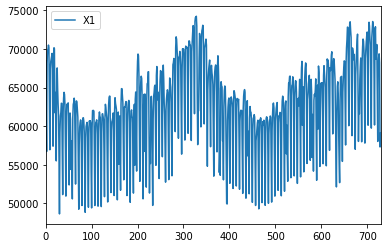

In [ ]:
data.plot()

C = 0.100000 	 Epsilon = 0.000100 	 Gamma = 0.031250
0.004429441530197162
C = 0.100000 	 Epsilon = 0.001000 	 Gamma = 0.031250
0.004397171072941193
C = 0.100000 	 Epsilon = 0.010000 	 Gamma = 0.031250
0.004367773416924335
C = 0.100000 	 Epsilon = 0.000100 	 Gamma = 0.062500
0.004217925014863819
C = 0.100000 	 Epsilon = 0.001000 	 Gamma = 0.062500
C = 0.100000 	 Epsilon = 0.010000 	 Gamma = 0.062500
C = 0.100000 	 Epsilon = 0.000100 	 Gamma = 0.125000
0.004071927803858086
C = 0.100000 	 Epsilon = 0.001000 	 Gamma = 0.125000
C = 0.100000 	 Epsilon = 0.010000 	 Gamma = 0.125000
0.004030860364333474
C = 0.100000 	 Epsilon = 0.000100 	 Gamma = 0.250000
0.0038414630440004515
C = 0.100000 	 Epsilon = 0.001000 	 Gamma = 0.250000
C = 0.100000 	 Epsilon = 0.010000 	 Gamma = 0.250000
C = 0.100000 	 Epsilon = 0.000100 	 Gamma = 0.500000
0.0036538525984784187
C = 0.100000 	 Epsilon = 0.001000 	 Gamma = 0.500000
0.003624316051467887
C = 0.100000 	 Epsilon = 0.010000 	 Gamma = 0.500000
0.003593363076

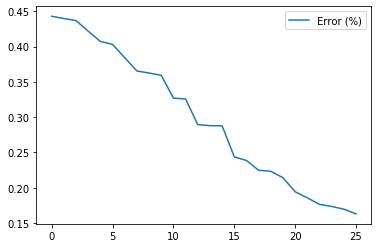

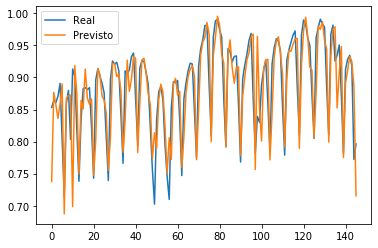

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import svm
from matplotlib import pyplot as plt
C = [1e-1,1e0,1e1,1e2]
gamma = [2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2]
epsilon = [1e-4,1e-3,1e-2]

 
threshold = 10**10 
error = []

for c in range(len(C)):
    for g in range(len(gamma)):
        for e in range(len(epsilon)):
          rgs = svm.SVR(C=C[c], epsilon=epsilon[e], gamma=gamma[g])
          print('C = %f \t Epsilon = %f \t Gamma = %f'%(C[c],epsilon[e],gamma[g]))
          rgs.fit(X_train, y_train)
          
          y_val_predict = rgs.predict(X_val)
          mse = mean_squared_error(y_val, y_val_predict) 
          if mse < threshold:
            threshold = mse
            bestRGS = rgs
            print(mse)
            
            error.append(mse*100)



print('\n\nBest parameters:\n C = %f \t Epsilon = %f \t Gamma = %f\n\n'%(C[c],epsilon[e],gamma[g]))
plt.plot(range(len(error)), error, label='Error (%)')

plt.legend()
plt.show()

predict_Test= bestRGS.predict(X_test)

plt.plot(range(len(y_test)), y_test, label='Real')
plt.plot(range(len(predict_Test)), predict_Test, label='Previsto')
plt.legend()
plt.show()
